# Optimización de la ubicación de una grúa en una obra de construcción 
## Santiago Padilla Arias 
## 28/11/2024
![](ITESO.png)

### Introducción 

Este problema impacta y se relaciona en mi carrera desde la cuestión del diseño de una estructura que es el punto que hace que se necesite de una grúa torre, cuestiones de logística, puesto que todos sabemos que el tiempo es oro y en la obra no es la excepción. Es por lo que en las construcciones de gran magnitud (en las que requieres grúa) si se ubica de manera adecuada afecta de manera directa (puede afectar de forma positiva o negativa) la eficiencia y por ende los costos de la obra. 


Con este proyecto se busca optimizar la posición de una grúa para facilitar el transporte de materiales lo que a su vez minimiza el tiempo que se emplea en esta actividad.

### Marco teórico

- Optimización no convexa: Este termino se refiere a una función objetivo que tiene más de una solución optima (es decir no solo hay una mejor opción, sino que hay varias “mejores opciones”)
- Funciones de costo: Ayudan a estimar el tiempo, en base a esto simulan un hipotético costo y a su vez evalúan la eficiencia en este caso en relación con la grúa.
- Restricciones: Son las limitantes que tiene el problema para poder encontrar lo óptimo, en el caso del proyecto esta el área donde se esta trabajando, la capacidad de carga que tiene la grúa y las zonas que no puede invadir la grúa.

### Objetivo

#### Generales 

Optimizar la ubicación de la grúa en una obra para minimizar el tiempo y costo del transporte de materiales.

#### Específicos

- Identificar los puntos de carga y descarga
- Definir una función de costo
- Identificar los puntos donde no se puede pasar para tomarse en cuenta al optimizar
- Comprobar con un experto si lo que arroge la programación tiene sentido 

### Simulación y optimización del modelo

In [133]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

limites_area = [(0, 150), (0, 150)] 
# Límites del área de construcción [(x), (y)], del lado izquierdo mínimo y derecha máximo
puntos_clave = np.array([[110, 10], [40, 140], [25, 75], [90, 30]])
# Coordenadas de los puntos clave 
# Puntos clave se refiere a todo aquel lugar de donde se requiere tomar material (cargar) o donde se deje material (descargar)
# De manera breve puntos clave es la zona de carga y descarga
pesos = np.array([1.5, 1.0, 2.0, 1.0]) 
# Mientras algo sea más pesado es más importante que la grúa este cerca
# Se debe priorizar que la grua este cerca de los objetos más pesados


def calcular_costo(coordenadas):
    x_grua, y_grua = coordenadas  # Coordenadas actuales de la grúa
    costo_total = 0 # El costo debe iniciarse
    for i, (x_punto, y_punto) in enumerate(puntos_clave):
        distancia = np.sqrt((x_grua - x_punto)**2 + (y_grua - y_punto)**2)  # Distancia a cada punto
        costo_total += pesos[i] * distancia  # Sumar la distancia 
    return costo_total

prediccion = [25, 25]  
# Donde se cree que estaría bien poner la grua, para pdoer tener un punto de partida
# En este caso yo pongo literalmente el medio del predio
resultado = minimize(
    calcular_costo,  # Lo que se desea calcular
    prediccion,   # El punto donde originalmente esta la grua
    bounds=limites_area,  # los límites donde se puede colocar la grua
    method='SLSQP'   # Método de optimización
)
# El paso de bounds= se puso porque si no el codigo no funcionaba
# y tambien lo de method, lo añadi con chat porque me trabe y no sabía como hacer que funcionará


In [134]:
ubicacion_optima = resultado.x 
print("Ubicación óptima:")
print( ubicacion_optima)

Ubicación óptima:
[40.53174549 70.02711231]


In [135]:
print("Costo mínimo:")
print(resultado.fun)

Costo mínimo:
303.9408300069547


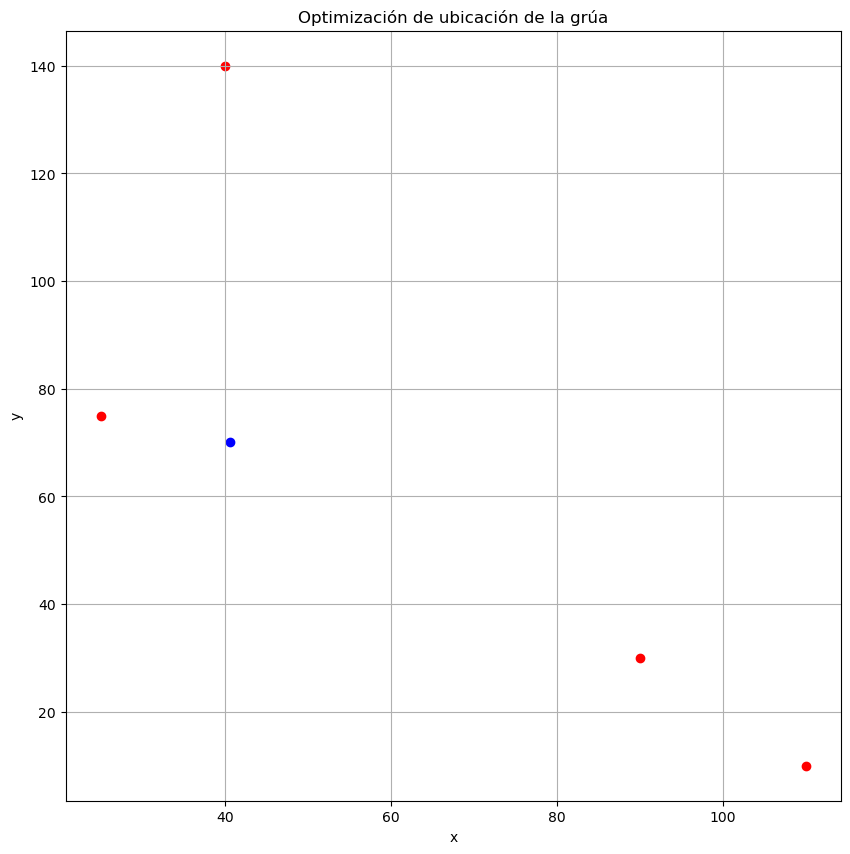

In [136]:
plt.figure(figsize=(10, 10))
plt.scatter(puntos_clave[:, 0], puntos_clave[:, 1], color='red', label='Puntos clave')
plt.scatter(ubicacion_optima[0], ubicacion_optima[1], color='blue', label='Grúa óptima')
plt.title("Optimización de ubicación de la grúa")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

### Interpretación de los resultados

Los resultados nos hacen ver que si tiene una ubicación óptima la grúa, pero no es posible hacerlo con el simple hecho de buscar el centro de los puntos planteados pues debe considerarse que se busca mínimizar el costo, además hay que cumplir con el área de trabajo delimitada y claramente considerar que hay objetos más pesados que otros y que en algunos casos es posible que el peso ese pueda derribar la grúa o quizá no algo tan grave pero si afectaría su funcionamiento lo que a su vez afectaría los tiempos de la obra y eso significa perdidas de dinero para el cliente y para el contratista en cuestión.

### Conclusiones

Este proyecto final me permitió darme cuenta que a pesar de que no fuera una clase que se me facilita o que me gustará mucho, poco a poco fui tomandole gusto por cosas como este proyecto. Ya que poco a poco fui dandome cuenta que estos conocimientos abarcaban los calculos, la estadistica, el algebra, la programación y todo eso lo tomaban y lo acercaban a mi carrera.

En cuanto a conclusiones sobre el proyecto, se estuvieron realizando varias pruebas junto con el ingeniero y arquitecto mencionados al final y primero se usaron datos "reales" de algunas obras en las que participaron (con lo que recordaban ya que era imposible recordar todos los detalles con exactitud) y se pudo ver que tenía sentido las ubicaciones que daba la prgogramación y luego se probó con algunos predios más grandes y con ubicaciones más alejadas entre las zonas de carga y descarga, lo cual hizo que con el conocimiento que llevo de la carrera y con la experiencia de los dos expertos que consulté todos llegamos al mismo punto, si este tipo de cosas fueran implementadas más seguido y en más áreas de la construcción 

### Referencias

- Bazaraa, M. S., Sherali, H. D., & Shetty, C. M. (2013). Nonlinear Programming: Theory and Algorithms. Wiley-Interscience.
- Boyd, S., & Vandenberghe, L. (2004). Convex Optimization. Cambridge University Press.
- Dantzig, G. B. (1998). Linear Programming and Extensions. Princeton University Press.
- SciPy. (2024). scipy.optimize.minimize documentation. Disponible en: https://docs.scipy.org/doc/scipy/
- Taha, H. A. (2017). Operations Research: An Introduction. Pearson Education.
- Comunicación personal con Ing. Javier Lomelín (02 de diciembre de 2024)
- Comunicación personal con Arq. Carlos Padilla (02 de diciembre de 2024)
- García, L. (2020). "Métodos de optimización en problemas reales". Universidad Politécnica de Valencia. Disponible en: https://www.upv.es/
- INGENIOXYZ (2021). "Optimización en la ingeniería civil: aplicaciones y ejemplos". Disponible en: https://www.ingenioxyz.com/
- Hernández, P. (2019). "Uso de Python en problemas de optimización". Blog Ciencia de Datos. Disponible en: https://cienciadedatos.net/
- Aguilar, J. (2022). "Optimización logística en proyectos de construcción". Revista Ingeniería y Desarrollo. Disponible en: https://www.revistaingenieria.com/
- SciPy (2023). "Documentación oficial de SciPy en español". Disponible en: https://scipy.github.io/devdocs/
- Rodríguez, M. (2018). "Métodos heurísticos y su aplicación en logística". Universidad Nacional Autónoma de México (UNAM). Disponible en: http://www.unam.mx/
- Ruiz, C. (2021). "Aplicaciones prácticas de la optimización en la construcción". Arquitectura Civil Online. Disponible en: https://arquitecturacivilonline.com/


In [144]:
# Evidentemente no tome cosas tal cual de todas las fuentes, pero estuve leyendo porque me atoraba entonces quizá tome cosas sin darme cuenta
# Por lo que no quiero apropiarme de algo que no es mío como tal